In [1]:
import itertools as it

import numpy as np

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

from IPython import display as d

In [23]:
def plot_cone(tile_name, ax):
    tile = pd.read_pickle(f"positions/positions_{tile_name}.pkl.bz2")
    cone = pd.read_pickle(f"cone_search/gema_{tile_name}_sample.pkl.bz2").id
    tile["ra_k"] = tile.ra_k.values.astype(float)
    tile["dec_k"] = tile.dec_k.values.astype(float)
    tile["Cone search"] = tile.id.isin(cone).apply(
        lambda b: "Selected" if b else "No-selected")
    sns.scatterplot(tile.ra_k, tile.dec_k, marker=".", hue=tile["Cone search"], ax=ax)
    ax.set_ylabel("Dec")
    ax.set_xlabel("RA")
    ax.set_title(f"Tile {tile_name}")

CPU times: user 41.2 s, sys: 724 ms, total: 41.9 s
Wall time: 41.2 s


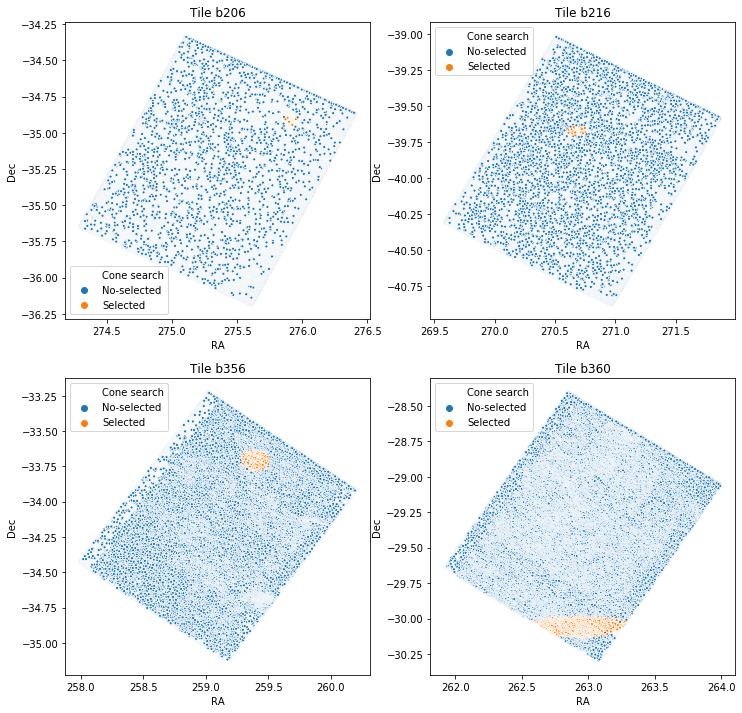

In [25]:
%%time

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = list(it.chain(*axes))

for name, ax in zip(["b206", "b216", "b356", "b360"], axes):
    plot_cone(name, ax)